In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('dados_disciplinas.txt', sep=',')

df

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
...,...,...,...,...,...,...,...
4637,827,2017,2,Reprovado,3,10,5
4638,828,2014,1,Reprovado por Frequencia,0,32,2
4639,829,2013,2,Reprovado por Frequencia,0,72,1
4640,830,2014,1,Reprovado por Frequencia,12,28,2


# 2013

In [3]:
df_2013 = df.loc[df['ANO'] == 2013]

df_2013

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
...,...,...,...,...,...,...,...
1289,254,2013,2,Dispensado,-1,-1,3
1290,254,2013,2,Dispensado,-1,-1,4
1291,254,2013,2,Dispensado,-1,-1,5
4639,829,2013,2,Reprovado por Frequencia,0,72,1


## Primeiro período

In [4]:
df_2013_1 = df_2013.loc[df_2013['PERIODO'] == 1]

df_2013_1

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
7,6,2013,1,Reprovado por Frequencia,10,42,4
8,7,2013,1,Reprovado por Frequencia,10,45,2
...,...,...,...,...,...,...,...
820,188,2013,1,Dispensado,-1,-1,2
821,188,2013,1,Dispensado,-1,-1,3
822,188,2013,1,Reprovado por Frequencia,7,38,4
825,189,2013,1,Reprovado por Frequencia,0,22,2


In [8]:
X_df_2013_1 = df_2013_1[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2013_1 = df_2013_1['SITUACAO']

In [9]:
X_train_2013_1, X_test_2013_1, y_train_2013_1, y_test_2013_1 = train_test_split(X_df_2013_1, y_df_2013_1, test_size=0.33, random_state=42)

In [10]:
X_treino_2013_1 = pd.DataFrame(X_train_2013_1)
X_teste_2013_1 = pd.DataFrame(X_test_2013_1)

In [11]:
model_2013_1 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2013_1.fit(X_treino_2013_1, y_train_2013_1)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
y_pred_2013_1 = model_2013_1.predict(X_teste_2013_1)

print("Acurácia:", accuracy_score(y_test_2013_1, y_pred_2013_1))

Acurácia: 0.975609756097561


In [13]:
y_test_2013_1.value_counts()

SITUACAO
Aprovado                    70
Reprovado por Frequencia    49
Reprovado                   31
Dispensado                  11
Equivalencia curricular      2
Trancamento parcial          1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia'),
  Text(5, 0, 'Trancamento parcial')])

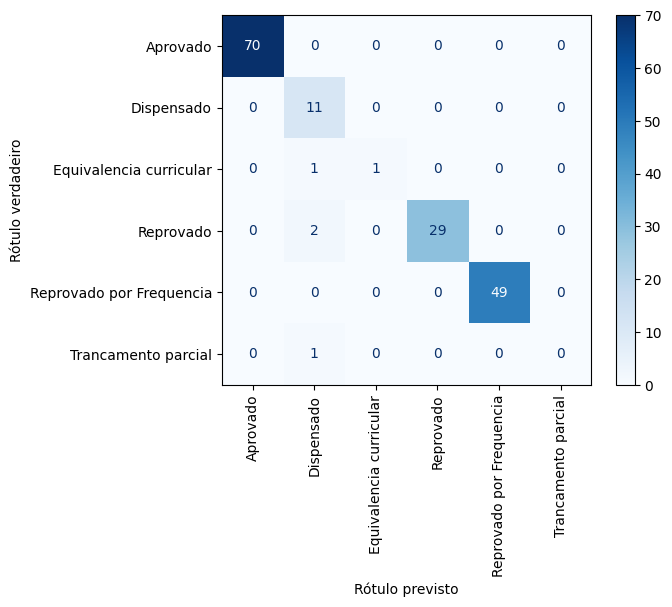

In [14]:
cm = confusion_matrix(y_test_2013_1, y_pred_2013_1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia', 'Trancamento parcial'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

## Segundo período

In [15]:
df_2013_2 = df_2013.loc[df_2013['PERIODO'] == 2]

df_2013_2

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
5,5,2013,2,Aprovado,60,4,2
9,8,2013,2,Equivalencia curricular,-1,-1,4
10,9,2013,2,Reprovado por Frequencia,0,66,3
...,...,...,...,...,...,...,...
1289,254,2013,2,Dispensado,-1,-1,3
1290,254,2013,2,Dispensado,-1,-1,4
1291,254,2013,2,Dispensado,-1,-1,5
4639,829,2013,2,Reprovado por Frequencia,0,72,1


In [16]:
X_df_2013_2 = df_2013_2[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2013_2 = df_2013_2['SITUACAO']

In [17]:
X_train_2013_2, X_test_2013_2, y_train_2013_2, y_test_2013_2 = train_test_split(X_df_2013_2, y_df_2013_2, test_size=0.33, random_state=42)

In [18]:
X_treino_2013_2 = pd.DataFrame(X_train_2013_2)
X_teste_2013_2 = pd.DataFrame(X_test_2013_2)

In [19]:
model_2013_2 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2013_2.fit(X_treino_2013_2, y_train_2013_2)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
y_pred_2013_2 = model_2013_2.predict(X_teste_2013_2)

print("Acurácia:", accuracy_score(y_test_2013_2, y_pred_2013_2))

Acurácia: 0.9869281045751634


In [21]:
y_test_2013_2.value_counts()

SITUACAO
Reprovado por Frequencia    55
Aprovado                    44
Reprovado                   32
Dispensado                  20
Trancamento parcial          1
Equivalencia curricular      1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia'),
  Text(5, 0, 'Trancamento parcial')])

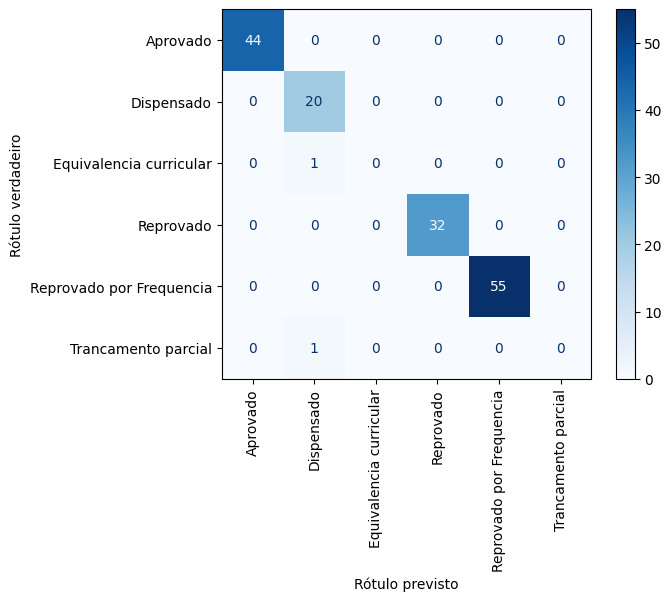

In [22]:
cm = confusion_matrix(y_test_2013_2, y_pred_2013_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia', 'Trancamento parcial'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

# 2014

In [23]:
df_2014 = df.loc[df['ANO'] == 2014]

df_2014

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
6,5,2014,2,Aprovado,97,8,4
14,12,2014,1,Aprovado,69,14,4
18,16,2014,1,Reprovado por Frequencia,0,46,5
21,17,2014,2,Reprovado,0,14,5
29,21,2014,1,Reprovado por Frequencia,0,52,2
...,...,...,...,...,...,...,...
2263,398,2014,2,Aprovado,77,6,4
2264,398,2014,2,Reprovado,6,2,5
2266,399,2014,2,Reprovado,3,16,5
4638,828,2014,1,Reprovado por Frequencia,0,32,2


## Primeiro período

In [24]:
df_2014_1 = df_2014.loc[df_2014['PERIODO'] == 1]

df_2014_1

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
14,12,2014,1,Aprovado,69,14,4
18,16,2014,1,Reprovado por Frequencia,0,46,5
29,21,2014,1,Reprovado por Frequencia,0,52,2
31,21,2014,1,Reprovado por Frequencia,0,70,5
64,36,2014,1,Reprovado por Frequencia,22,20,2
...,...,...,...,...,...,...,...
1745,320,2014,1,Reprovado,0,0,3
1746,320,2014,1,Reprovado por Frequencia,3,22,4
1747,320,2014,1,Reprovado por Frequencia,0,28,5
4638,828,2014,1,Reprovado por Frequencia,0,32,2


In [25]:
X_df_2014_1 = df_2014_1[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2014_1 = df_2014_1['SITUACAO']

In [26]:
X_train_2014_1, X_test_2014_1, y_train_2014_1, y_test_2014_1 = train_test_split(X_df_2014_1, y_df_2014_1, test_size=0.33, random_state=42)

In [27]:
X_treino_2014_1 = pd.DataFrame(X_train_2014_1)
X_teste_2014_1 = pd.DataFrame(X_test_2014_1)

In [28]:
model_2014_1 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2014_1.fit(X_treino_2014_1, y_train_2014_1)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
y_pred_2014_1 = model_2014_1.predict(X_teste_2014_1)

print("Acurácia:", accuracy_score(y_test_2014_1, y_pred_2014_1))

Acurácia: 0.9862068965517241


In [32]:
y_test_2014_1.value_counts()

SITUACAO
Aprovado                    58
Reprovado por Frequencia    41
Reprovado                   30
Dispensado                  15
Equivalencia curricular      1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia')])

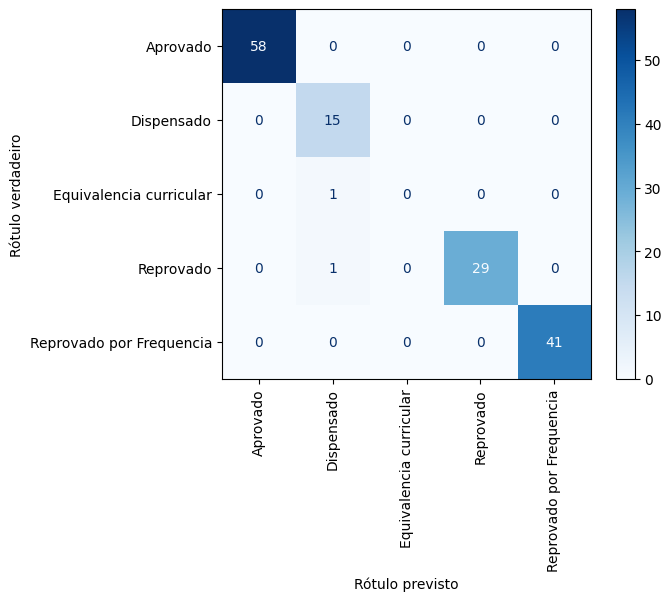

In [33]:
cm = confusion_matrix(y_test_2014_1, y_pred_2014_1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

## Segundo período

In [34]:
df_2014_2 = df_2014.loc[df_2014['PERIODO'] == 2]

df_2014_2

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
6,5,2014,2,Aprovado,97,8,4
21,17,2014,2,Reprovado,0,14,5
57,33,2014,2,Reprovado por Frequencia,0,68,4
70,37,2014,2,Reprovado,53,18,4
85,42,2014,2,Reprovado por Frequencia,0,52,2
...,...,...,...,...,...,...,...
2259,398,2014,2,Reprovado,27,0,2
2261,398,2014,2,Reprovado,53,2,3
2263,398,2014,2,Aprovado,77,6,4
2264,398,2014,2,Reprovado,6,2,5


In [35]:
X_df_2014_2 = df_2014_2[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2014_2 = df_2014_2['SITUACAO']

In [36]:
X_train_2014_2, X_test_2014_2, y_train_2014_2, y_test_2014_2 = train_test_split(X_df_2014_2, y_df_2014_2, test_size=0.33, random_state=42)

In [37]:
X_treino_2014_2 = pd.DataFrame(X_train_2014_2)
X_teste_2014_2 = pd.DataFrame(X_test_2014_2)

In [38]:
model_2014_2 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2014_2.fit(X_treino_2014_2, y_train_2014_2)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [39]:
y_pred_2014_2 = model_2014_2.predict(X_teste_2014_2)

print("Acurácia:", accuracy_score(y_test_2014_2, y_pred_2014_2))

Acurácia: 0.989010989010989


In [40]:
y_test_2014_2.value_counts()

SITUACAO
Aprovado                    71
Reprovado                   57
Reprovado por Frequencia    32
Dispensado                  21
Equivalencia curricular      1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia')])

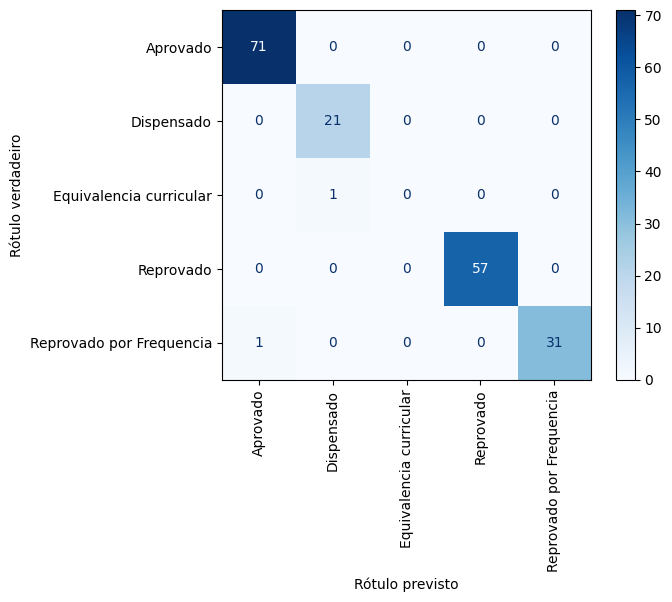

In [41]:
cm = confusion_matrix(y_test_2014_2, y_pred_2014_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

# 2015

In [42]:
df_2015 = df.loc[df['ANO'] == 2015]

df_2015

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
41,25,2015,1,Aprovado,70,10,3
65,36,2015,1,Reprovado por Frequencia,0,72,2
92,45,2015,1,Aprovado,84,16,4
162,75,2015,1,Reprovado por Frequencia,0,70,2
188,84,2015,1,Reprovado,23,14,2
...,...,...,...,...,...,...,...
3074,531,2015,2,Aprovado,74,10,1
3075,531,2015,2,Reprovado,23,14,2
3077,531,2015,2,Aprovado,85,0,3
3078,531,2015,2,Reprovado por Frequencia,0,22,4


## Primeiro período

In [43]:
df_2015_1 = df_2015.loc[df_2015['PERIODO'] == 1]

df_2015_1

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
41,25,2015,1,Aprovado,70,10,3
65,36,2015,1,Reprovado por Frequencia,0,72,2
92,45,2015,1,Aprovado,84,16,4
162,75,2015,1,Reprovado por Frequencia,0,70,2
188,84,2015,1,Reprovado,23,14,2
...,...,...,...,...,...,...,...
2678,469,2015,1,Aprovado,74,6,1
2679,469,2015,1,Reprovado,22,2,2
2681,469,2015,1,Aprovado,90,2,3
2682,469,2015,1,Reprovado,37,6,4


In [44]:
X_df_2015_1 = df_2015_1[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2015_1 = df_2015_1['SITUACAO']

In [45]:
X_train_2015_1, X_test_2015_1, y_train_2015_1, y_test_2015_1 = train_test_split(X_df_2015_1, y_df_2015_1, test_size=0.33, random_state=42)

In [46]:
X_treino_2015_1 = pd.DataFrame(X_train_2015_1)
X_teste_2015_1 = pd.DataFrame(X_test_2015_1)

In [47]:
model_2015_1 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2015_1.fit(X_treino_2015_1, y_train_2015_1)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [48]:
y_pred_2015_1 = model_2015_1.predict(X_teste_2015_1)

print("Acurácia:", accuracy_score(y_test_2015_1, y_pred_2015_1))

Acurácia: 0.9710144927536232


In [49]:
y_test_2015_1.value_counts()

SITUACAO
Aprovado                    72
Reprovado por Frequencia    30
Dispensado                  17
Reprovado                   16
Equivalencia curricular      3
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia')])

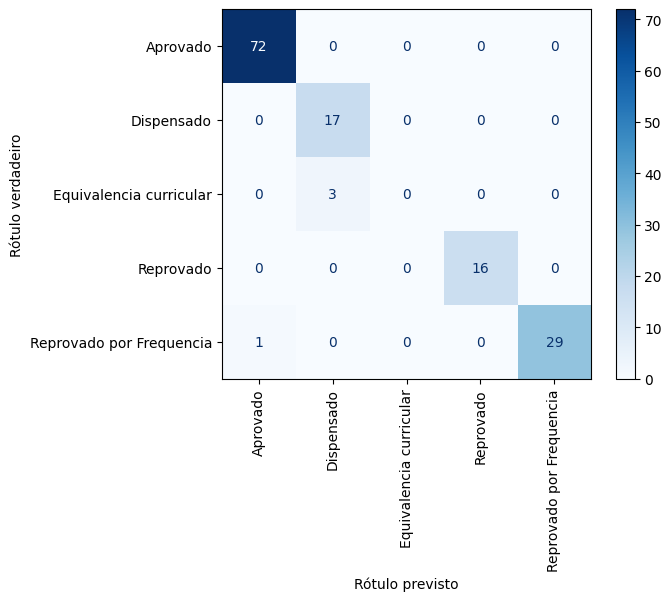

In [50]:
cm = confusion_matrix(y_test_2015_1, y_pred_2015_1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

## Segundo período

In [51]:
df_2015_2 = df_2015.loc[df_2015['PERIODO'] == 2]

df_2015_2

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
622,160,2015,2,Aprovado,87,0,3
819,188,2015,2,Reprovado por Frequencia,0,62,1
844,192,2015,2,Reprovado,18,16,4
1053,224,2015,2,Aprovado,60,2,2
1062,225,2015,2,Aprovado,68,14,1
...,...,...,...,...,...,...,...
3074,531,2015,2,Aprovado,74,10,1
3075,531,2015,2,Reprovado,23,14,2
3077,531,2015,2,Aprovado,85,0,3
3078,531,2015,2,Reprovado por Frequencia,0,22,4


In [52]:
X_df_2015_2 = df_2015_2[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2015_2 = df_2015_2['SITUACAO']

In [53]:
X_train_2015_2, X_test_2015_2, y_train_2015_2, y_test_2015_2 = train_test_split(X_df_2015_2, y_df_2015_2, test_size=0.33, random_state=42)

In [54]:
X_treino_2015_2 = pd.DataFrame(X_train_2015_2)
X_teste_2015_2 = pd.DataFrame(X_test_2015_2)

In [55]:
model_2015_2 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2015_2.fit(X_treino_2015_2, y_train_2015_2)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [56]:
y_pred_2015_2 = model_2015_2.predict(X_teste_2015_2)

print("Acurácia:", accuracy_score(y_test_2015_2, y_pred_2015_2))

Acurácia: 0.9826086956521739


In [57]:
y_test_2015_2.value_counts()

SITUACAO
Aprovado                    65
Reprovado                   21
Dispensado                  14
Reprovado por Frequencia    13
Trancamento parcial          1
Equivalencia curricular      1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia'),
  Text(5, 0, 'Trancamento parcial')])

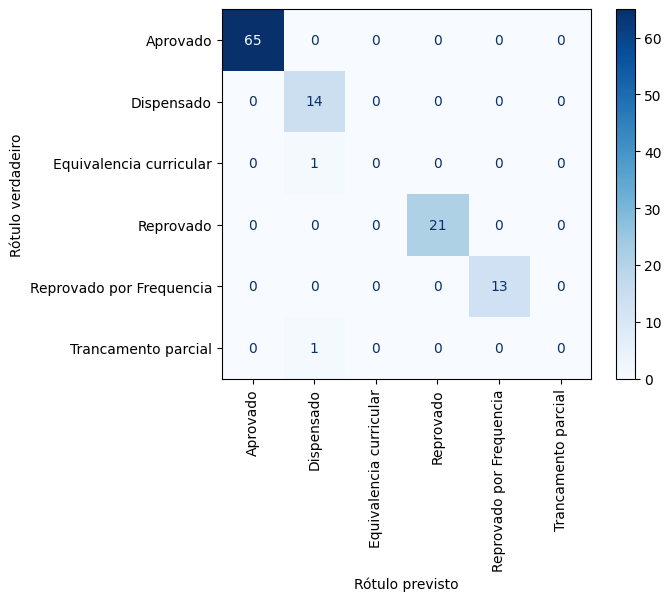

In [58]:
cm = confusion_matrix(y_test_2015_2, y_pred_2015_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia', 'Trancamento parcial'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

# 2016

In [59]:
df_2016 = df.loc[df['ANO'] == 2016]

df_2016

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
15,13,2016,1,Aprovado,90,10,4
26,19,2016,2,Aprovado,93,6,3
50,28,2016,2,Reprovado,44,8,2
51,29,2016,2,Reprovado,29,10,4
56,32,2016,1,Aprovado,89,2,4
...,...,...,...,...,...,...,...
3922,684,2016,2,Aprovado,82,4,1
3923,684,2016,2,Reprovado,5,12,2
3926,684,2016,2,Reprovado,26,10,3
3928,684,2016,2,Reprovado,50,4,4


## Primeiro período

In [60]:
df_2016_1 = df_2016.loc[df_2016['PERIODO'] == 1]

df_2016_1

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
15,13,2016,1,Aprovado,90,10,4
56,32,2016,1,Aprovado,89,2,4
58,33,2016,1,Reprovado por Frequencia,0,42,4
72,38,2016,1,Equivalencia curricular,-1,-1,4
81,41,2016,1,Reprovado,15,0,4
...,...,...,...,...,...,...,...
3507,610,2016,1,Aprovado,61,0,1
3508,610,2016,1,Reprovado,18,2,2
3510,610,2016,1,Reprovado,49,6,3
3512,610,2016,1,Aprovado,60,0,4


In [61]:
X_df_2016_1 = df_2016_1[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2016_1 = df_2016_1['SITUACAO']

In [62]:
X_train_2016_1, X_test_2016_1, y_train_2016_1, y_test_2016_1 = train_test_split(X_df_2016_1, y_df_2016_1, test_size=0.33, random_state=42)

In [63]:
X_treino_2016_1 = pd.DataFrame(X_train_2016_1)
X_teste_2016_1 = pd.DataFrame(X_test_2016_1)

In [64]:
model_2016_1 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2016_1.fit(X_treino_2016_1, y_train_2016_1)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [65]:
y_pred_2016_1 = model_2016_1.predict(X_teste_2016_1)

print("Acurácia:", accuracy_score(y_test_2016_1, y_pred_2016_1))

Acurácia: 0.9828571428571429


In [66]:
y_test_2016_1.value_counts()

SITUACAO
Aprovado                    64
Reprovado por Frequencia    43
Reprovado                   37
Dispensado                  28
Equivalencia curricular      2
Trancamento parcial          1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia'),
  Text(5, 0, 'Trancamento parcial')])

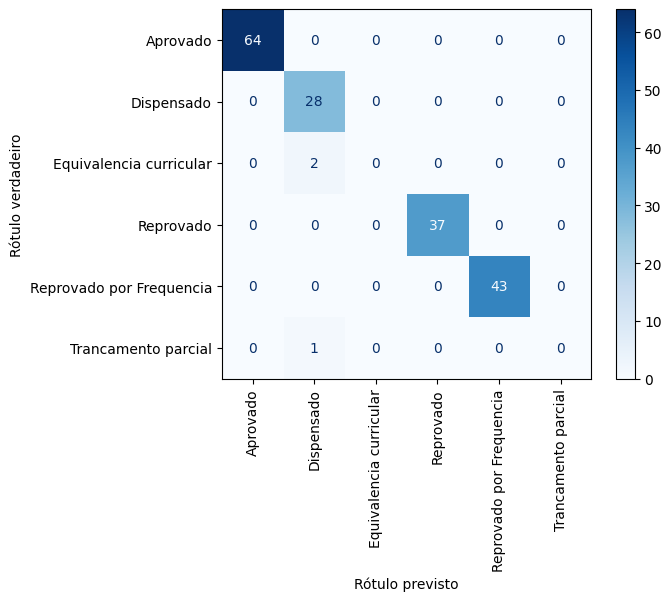

In [67]:
cm = confusion_matrix(y_test_2016_1, y_pred_2016_1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia', 'Trancamento parcial'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

## Segundo período

In [68]:
df_2016_2 = df_2016.loc[df_2016['PERIODO'] == 2]

df_2016_2

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
26,19,2016,2,Aprovado,93,6,3
50,28,2016,2,Reprovado,44,8,2
51,29,2016,2,Reprovado,29,10,4
66,36,2016,2,Reprovado,0,16,2
141,67,2016,2,Aprovado,75,4,4
...,...,...,...,...,...,...,...
3922,684,2016,2,Aprovado,82,4,1
3923,684,2016,2,Reprovado,5,12,2
3926,684,2016,2,Reprovado,26,10,3
3928,684,2016,2,Reprovado,50,4,4


In [69]:
X_df_2016_2 = df_2016_2[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2016_2 = df_2016_2['SITUACAO']

In [70]:
X_train_2016_2, X_test_2016_2, y_train_2016_2, y_test_2016_2 = train_test_split(X_df_2016_2, y_df_2016_2, test_size=0.33, random_state=42)

In [71]:
X_treino_2016_2 = pd.DataFrame(X_train_2016_2)
X_teste_2016_2 = pd.DataFrame(X_test_2016_2)

In [72]:
model_2016_2 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2016_2.fit(X_treino_2016_2, y_train_2016_2)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [73]:
y_pred_2016_2 = model_2016_2.predict(X_teste_2016_2)

print("Acurácia:", accuracy_score(y_test_2016_2, y_pred_2016_2))

Acurácia: 1.0


In [74]:
y_test_2016_2.value_counts()

SITUACAO
Aprovado                    71
Reprovado                   40
Reprovado por Frequencia    27
Dispensado                  17
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Reprovado'),
  Text(3, 0, 'Reprovado por Frequencia')])

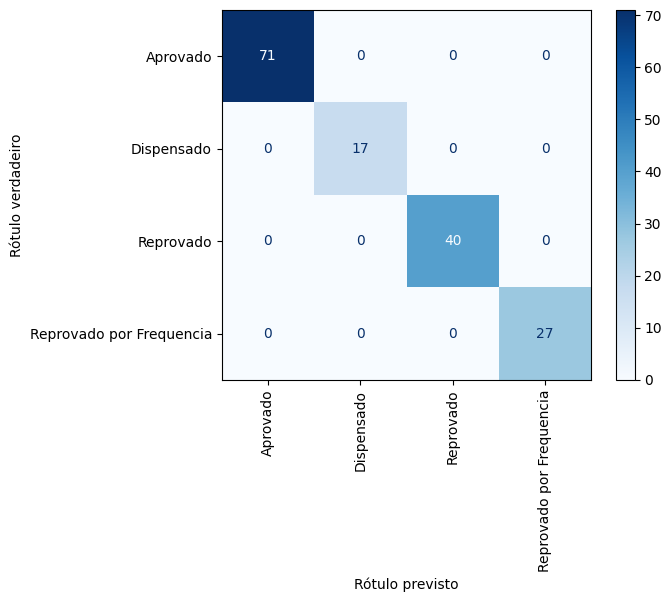

In [75]:
cm = confusion_matrix(y_test_2016_2, y_pred_2016_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Reprovado', 'Reprovado por Frequencia'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

# 2017

In [76]:
df_2017 = df.loc[df['ANO'] == 2017]

df_2017

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
17,15,2017,2,Aprovado,79,10,5
67,36,2017,1,Reprovado por Frequencia,0,60,2
117,54,2017,1,Aprovado,65,4,4
134,65,2017,2,Aprovado,74,8,3
191,84,2017,1,Reprovado,30,18,2
...,...,...,...,...,...,...,...
4633,827,2017,2,Aprovado,60,8,1
4634,827,2017,2,Aprovado,60,2,2
4635,827,2017,2,Aprovado,62,8,3
4636,827,2017,2,Reprovado,26,8,4


## Primeiro período

In [77]:
df_2017_1 = df_2017.loc[df_2017['PERIODO'] == 1]

df_2017_1

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
67,36,2017,1,Reprovado por Frequencia,0,60,2
117,54,2017,1,Aprovado,65,4,4
191,84,2017,1,Reprovado,30,18,2
195,84,2017,1,Reprovado,5,2,4
228,90,2017,1,Reprovado por Frequencia,0,62,4
...,...,...,...,...,...,...,...
4311,760,2017,1,Aprovado,77,1,1
4314,761,2017,1,Reprovado,10,6,2
4315,761,2017,1,Reprovado por Frequencia,0,22,3
4317,762,2017,1,Aprovado,60,0,1


In [78]:
X_df_2017_1 = df_2017_1[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2017_1 = df_2017_1['SITUACAO']

In [79]:
X_train_2017_1, X_test_2017_1, y_train_2017_1, y_test_2017_1 = train_test_split(X_df_2017_1, y_df_2017_1, test_size=0.33, random_state=42)

In [80]:
X_treino_2017_1 = pd.DataFrame(X_train_2017_1)
X_teste_2017_1 = pd.DataFrame(X_test_2017_1)

In [81]:
model_2017_1 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2017_1.fit(X_treino_2017_1, y_train_2017_1)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [82]:
y_pred_2017_1 = model_2017_1.predict(X_teste_2017_1)

print("Acurácia:", accuracy_score(y_test_2017_1, y_pred_2017_1))

Acurácia: 0.9875776397515528


In [83]:
y_test_2017_1.value_counts()

SITUACAO
Aprovado                    83
Reprovado                   48
Reprovado por Frequencia    17
Dispensado                  11
Equivalencia curricular      1
Trancamento parcial          1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia'),
  Text(5, 0, 'Trancamento parcial')])

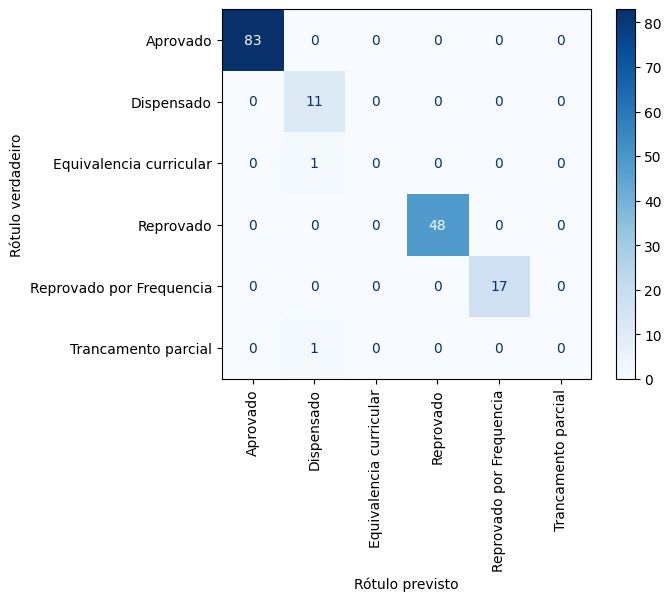

In [84]:
cm = confusion_matrix(y_test_2017_1, y_pred_2017_1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia', 'Trancamento parcial'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)

## Segundo período

In [86]:
df_2017_2 = df_2017.loc[df_2017['PERIODO'] == 2]

df_2017_2

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
17,15,2017,2,Aprovado,79,10,5
134,65,2017,2,Aprovado,74,8,3
192,84,2017,2,Reprovado por Frequencia,5,40,2
196,84,2017,2,Reprovado por Frequencia,23,24,4
660,165,2017,2,Aprovado,60,12,4
...,...,...,...,...,...,...,...
4633,827,2017,2,Aprovado,60,8,1
4634,827,2017,2,Aprovado,60,2,2
4635,827,2017,2,Aprovado,62,8,3
4636,827,2017,2,Reprovado,26,8,4


In [87]:
X_df_2017_2 = df_2017_2[['MEDIA_FINAL', 'NUM_FALTAS']]
y_df_2017_2 = df_2017_2['SITUACAO']

In [88]:
X_train_2017_2, X_test_2017_2, y_train_2017_2, y_test_2017_2 = train_test_split(X_df_2017_2, y_df_2017_2, test_size=0.33, random_state=42)

In [89]:
X_treino_2017_2 = pd.DataFrame(X_train_2017_2)
X_teste_2017_2 = pd.DataFrame(X_test_2017_2)

In [90]:
model_2017_2 = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

model_2017_2.fit(X_treino_2017_2, y_train_2017_2)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [91]:
y_pred_2017_2 = model_2017_2.predict(X_teste_2017_2)

print("Acurácia:", accuracy_score(y_test_2017_2, y_pred_2017_2))

Acurácia: 0.94


In [92]:
y_test_2017_2.value_counts()

SITUACAO
Aprovado                    54
Reprovado                   53
Reprovado por Frequencia    24
Dispensado                  11
Trancamento parcial          6
Equivalencia curricular      2
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Aprovado'),
  Text(1, 0, 'Dispensado'),
  Text(2, 0, 'Equivalencia curricular'),
  Text(3, 0, 'Reprovado'),
  Text(4, 0, 'Reprovado por Frequencia'),
  Text(5, 0, 'Trancamento parcial')])

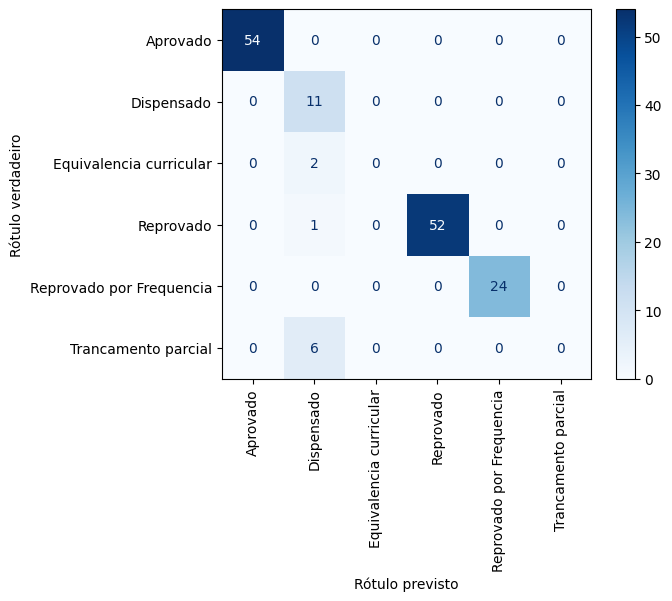

In [93]:
cm = confusion_matrix(y_test_2017_2, y_pred_2017_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Dispensado', 'Equivalencia curricular', 'Reprovado', 'Reprovado por Frequencia', 'Trancamento parcial'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.xticks(rotation=90)